# Artificial Nueral Network

In [3]:
%matplotlib inline

[1 0 2 1 1 0 1 2 2 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2]
[[19  0  0]
 [ 0 14  1]
 [ 0  0 16]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.93      0.97        15
           2       0.94      1.00      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



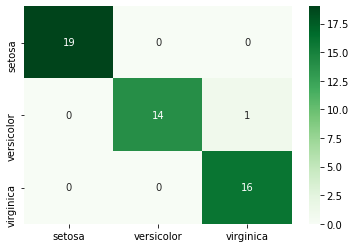

In [4]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

iris = datasets.load_iris()
X = iris.data[:, :]  
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3, 3), random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
#y_pred  = np.argmax(y_pred, axis =-1)
print(y_pred)

#y_test  = np.argmax(y_test, axis =-1)
print(y_test)

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
cr = classification_report(y_test, y_pred)
print(cr)

import seaborn as sns
sns.heatmap(cm,cmap='Greens', annot=True,xticklabels=iris.target_names,yticklabels=iris.target_names)

In [2]:
import tensorflow as tf

# Initialize two constants
x1 = tf.constant([1,2,3,4])
x2 = tf.constant([5,6,7,8])

# Multiply
result = tf.multiply(x1, x2)

# Print the result
print(result)

tf.Tensor([ 5 12 21 32], shape=(4,), dtype=int32)


In [48]:
from tensorflow import keras
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Input,Dense

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :]  # we only take the first two features.
y = iris.target

y = y.reshape((len(y),-1))

encoder = OneHotEncoder(sparse=False)
Y = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

tf.random.set_seed(42)


model = Sequential([                  
 Input((4)),
 Dense(100, activation='relu'),
 Dense(50, activation='relu'),
 Dense(3, activation='softmax')
])

'''
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = (4,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(3, activation='softmax'))
'''
'''
input = Input(shape=(4,))
x = Dense(100, activation='relu', input_shape = (4,))(input)
x = Dense(50, activation='relu')(x)
output = Dense(3, activation='softmax')(x)
model = Model(input, output )
'''

model.compile(optimizer='sgd',loss="categorical_crossentropy",metrics=['accuracy'])

model.summary()

model.fit(X_train,y_train,epochs=100,batch_size=16)
model.evaluate(X_test,y_test)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        [(None, 4)]               0         
_________________________________________________________________
dense_37 (Dense)             (None, 100)               500       
_________________________________________________________________
dense_38 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_39 (Dense)             (None, 3)                 153       
Total params: 5,703
Trainable params: 5,703
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
7/7 [==============================] - 0s 2ms/step - loss: 1.1032 - accuracy: 0.3055
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 0.9878 - accuracy: 0.3625
Epoch 3/100
7/7 [==============================] - 0s 2ms/step 

[0.1346561312675476, 0.9599999785423279]

In [35]:
y_pred  = np.argmax(model(X_test), axis =-1)
print(y_pred)

y_true =  np.argmax(y_test, axis =-1)
print(y_true)

[1 0 2 1 1 0 1 2 2 1 2 0 0 0 0 1 2 1 2 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [37]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_true, y_pred)
print(cm)
cr = classification_report(y_true, y_pred)
print(cr)

[[19  0  0]
 [ 0 13  2]
 [ 0  0 16]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.87      0.93        15
           2       0.89      1.00      0.94        16

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



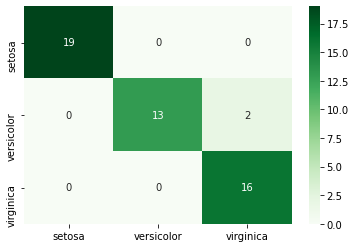

In [44]:
import seaborn as sns
sns.heatmap(cm,cmap='Greens', annot=True,xticklabels=iris.target_names,yticklabels=iris.target_names)